In [1]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [2]:
URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [3]:
# Loading the WebPage in Memory using requests library
page = requests.get(URL)

In [4]:
# Check the Status Code of the Page
page.status_code

200

In [5]:
htmlCode = page.text

In [6]:
# Format the HTML code using bs4 library
soup = BeautifulSoup(htmlCode)

In [7]:
help(soup)

Help on BeautifulSoup in module bs4 object:

class BeautifulSoup(bs4.element.Tag)
 |  BeautifulSoup(markup='', features=None, builder=None, parse_only=None, from_encoding=None, exclude_encodings=None, element_classes=None, **kwargs)
 |  
 |  A data structure representing a parsed HTML or XML document.
 |  
 |  Most of the methods you'll call on a BeautifulSoup object are inherited from
 |  PageElement or Tag.
 |  
 |  Internally, this class defines the basic interface called by the
 |  tree builders when converting an HTML/XML document into a data
 |  structure. The interface abstracts away the differences between
 |  parsers. To write a new tree builder, you'll need to understand
 |  these methods as a whole.
 |  
 |  These methods will be called by the BeautifulSoup constructor:
 |    * reset()
 |    * feed(markup)
 |  
 |  The tree builder may call these methods from its feed() implementation:
 |    * handle_starttag(name, attrs) # See note about return value
 |    * handle_endtag(n

In [9]:
# Scrapping the Web Page
title = []
rating = []
price = []
features = []

for i in range(1, 31):
    URL = 'https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'. format(i)
    
    page = requests.get(URL)
    htmlCode = page.text
    
    soup = BeautifulSoup(htmlCode)
    
    for x in soup.find_all('div', attrs={'class' : '_2kHMtA'}):

        product = x.find('div', attrs={'class' : '_4rR01T'})
        if product is None:
            title.append(np.NaN)
        else:
            title.append(product.text)

        mrp = x.find('div', attrs={'class' : '_30jeq3 _1_WHN1'})
        if mrp is None:
            price.append(np.NaN)
        else:
            price.append(mrp.text)

        rate = x.find('div', attrs={'class' : '_3LWZlK'})
        if rate is None:
            rating.append(np.NaN)
        else:
            rating.append(rate.text)

        f = x.find('ul', attrs={'class' : '_1xgFaf'})
        if f is None:
            features.append(np.NaN)
        else:
            features.append(f.text)

In [10]:
print(len(title))
print(len(price))
print(len(rating))
print(len(features))

711
711
711
711


In [11]:
df = pd.DataFrame({'Product' : title, 'Rating' : rating, 'MRP' : price, 'Feature' : features})

In [12]:
df.head()

,Product,Rating,MRP,Feature
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...


In [13]:
df.shape

(711, 4)

In [14]:
df.tail()

,Product,Rating,MRP,Feature
706,acer Chromebook Celeron Dual Core - (4 GB/16 G...,3.3,"₹23,990",Intel Celeron Dual Core Processor4 GB DDR4 RAM...
707,ASUS Zenbook Flip 13 OLED Touch Panel Core i5 ...,3.3,"₹87,990",Intel Core i5 Processor (11th Gen)8 GB DDR4 RA...
708,ASUS Vivobook 14 Core i3 10th Gen - (4 GB/1 TB...,3,"₹34,590",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...
709,Lenovo v15 Core i3 10th Gen - (4 GB/1 TB HDD/D...,3.1,"₹39,999",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...
710,ASUS Core i3 10th Gen - (4 GB/1 TB HDD/Windows...,3.1,"₹34,990",Intel Core i3 Processor (10th Gen)4 GB DDR4 RA...


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Product  711 non-null    object
 1   Rating   537 non-null    object
 2   MRP      711 non-null    object
 3   Feature  711 non-null    object
dtypes: object(4)
memory usage: 22.3+ KB


In [16]:
df.to_csv('Laptop_Details.csv', index = False)

In [17]:
import numpy as np
import pandas as pd
import re

In [18]:
df = pd.read_csv("Laptop_Details.csv")
df.head()

,Product,Rating,MRP,Feature
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...


In [19]:
print(df['Feature'][0])
print(df['Feature'][2])
print(df['Feature'][6])

Free upgrade to Windows 11 when availableIntel Core i5 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayQuick Access, Acer Care Center, Acer Product Registration, Acer Collection1 Year International Travelers Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD35.56 cm (14 inch) DisplayMicrosoft Office Home and Student 20191 Year Onsite Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayMicrosoft Office Home and Student 2019, HP Documentation, HP BIOS Recovery, HP Smart, HP Support Assistant, Dropbox1 Year Onsite Warranty


In [20]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [21]:
df.head()

,Product,Rating,MRP,Feature,Processor
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,[]
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,[AMD Ryzen 3 Dual Core Processor]
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor]
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]


In [22]:
temp = df['Feature'][100]

regex = r'\d+\sGB[\s\w]+RAM'

fun = lambda x : re.findall(regex, x)

print(fun(temp))


['8 GB DDR4 RAM']


In [23]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [24]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,[],[8 GB DDR4 RAM]
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,[AMD Ryzen 3 Dual Core Processor],[8 GB DDR4 RAM]
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM]
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]


In [25]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [26]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(regex, x))

In [27]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,[],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,[AMD Ryzen 3 Dual Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD]
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD]
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[],[256 GB SSD]
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[],[512 GB SSD]


In [28]:
# Brand

regex = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(regex, x))

In [29]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,[],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[acer]
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,[AMD Ryzen 3 Dual Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[ASUS]
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[DELL]
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[],[256 GB SSD],[ASUS]
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[RedmiBook]


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    711 non-null    object 
 1   Rating     537 non-null    float64
 2   MRP        711 non-null    object 
 3   Feature    711 non-null    object 
 4   Processor  711 non-null    object 
 5   RAM        711 non-null    object 
 6   OS         711 non-null    object 
 7   Storage    711 non-null    object 
 8   Brand      711 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.1+ KB


In [31]:
df.isnull().sum()

Product        0
Rating       174
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [32]:
print(df['Processor'][0])

print(type(df['Processor'][0]))

[]
<class 'list'>


In [33]:
print(''.join(df['Processor'][0]))
print(type(''.join(df['Processor'][0])))


<class 'str'>


In [34]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,[],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[acer]
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,[AMD Ryzen 3 Dual Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[256 GB SSD],[ASUS]
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[1 TB HDD],[DELL]
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,[Intel Core i3 Processor],[4 GB DDR4 RAM],[],[256 GB SSD],[ASUS]
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[RedmiBook]


In [35]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))

In [36]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,"₹52,990",Free upgrade to Windows 11 when availableIntel...,,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,acer
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,"₹36,990",AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,ASUS
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,"₹36,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,DELL
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,"₹36,990",Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,,256 GB SSD,ASUS
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,"₹40,999",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,,512 GB SSD,RedmiBook


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    711 non-null    object 
 1   Rating     537 non-null    float64
 2   MRP        711 non-null    object 
 3   Feature    711 non-null    object 
 4   Processor  711 non-null    object 
 5   RAM        711 non-null    object 
 6   OS         711 non-null    object 
 7   Storage    711 non-null    object 
 8   Brand      711 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.1+ KB


In [38]:
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [39]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,52990.0,Free upgrade to Windows 11 when availableIntel...,,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,acer
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,36990.0,AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,ASUS
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,36990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,DELL
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,36990.0,Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,,256 GB SSD,ASUS
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,40999.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,,512 GB SSD,RedmiBook


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    711 non-null    object 
 1   Rating     537 non-null    float64
 2   MRP        711 non-null    float64
 3   Feature    711 non-null    object 
 4   Processor  711 non-null    object 
 5   RAM        711 non-null    object 
 6   OS         711 non-null    object 
 7   Storage    711 non-null    object 
 8   Brand      711 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.1+ KB


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,52990.0,Free upgrade to Windows 11 when availableIntel...,,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,acer
1,ASUS Ryzen 3 Dual Core 3250U 3rd Gen - (8 GB/2...,4.3,36990.0,AMD Ryzen 3 Dual Core Processor (3rd Gen)8 GB ...,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,ASUS
2,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,4.0,36990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,DELL
3,ASUS VivoBook 15 (2021) Core i3 11th Gen - (4 ...,4.3,36990.0,Intel Core i3 Processor (11th Gen)4 GB DDR4 RA...,Intel Core i3 Processor,4 GB DDR4 RAM,,256 GB SSD,ASUS
4,RedmiBook 15 e-Learning Edition Core i3 11th G...,4.3,40999.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,,512 GB SSD,RedmiBook


<AxesSubplot:xlabel='Brand', ylabel='MRP'>

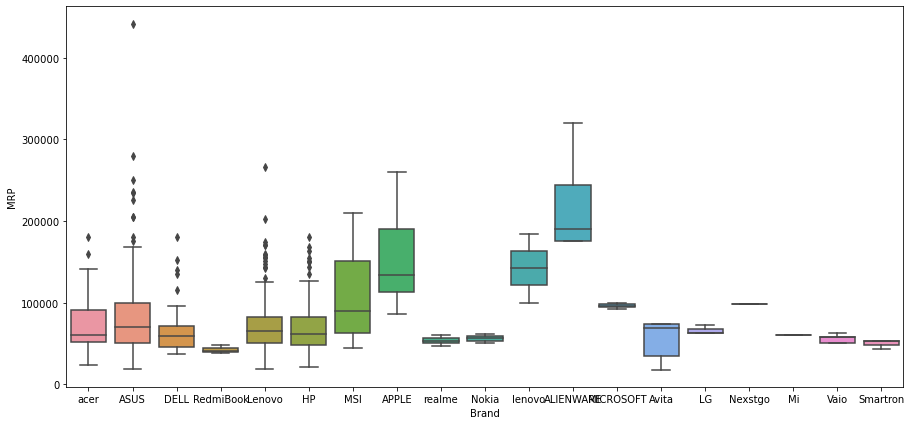

In [43]:
plt.figure(figsize=(15, 7))
sns.boxplot(x = df.Brand, y = df.MRP)

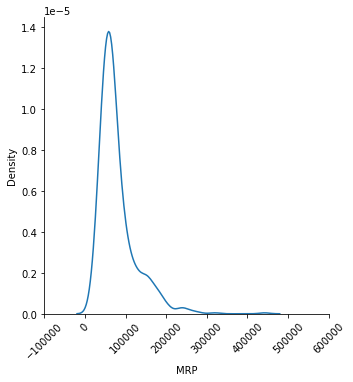

In [44]:
g = sns.displot(df.MRP, kind='kde')
g.set_xticklabels(rotation=45)

<AxesSubplot:xlabel='Brand', ylabel='count'>

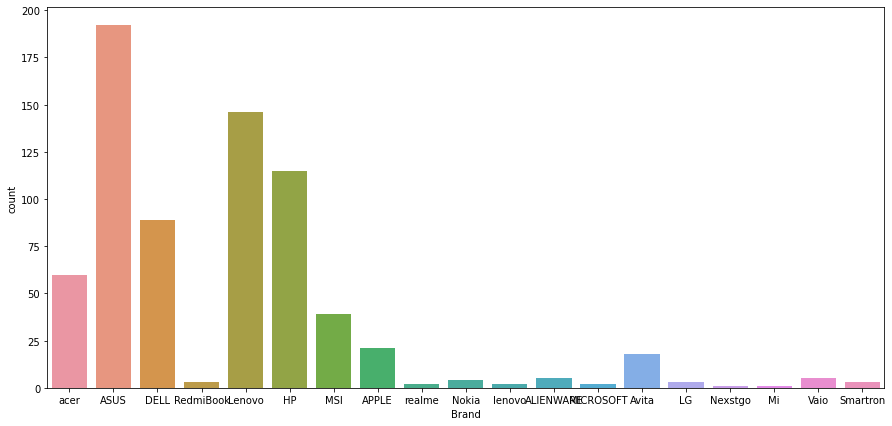

In [45]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.Brand)

In [46]:
df.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
                min       max           mean
Brand                                       
ALIENWARE  174990.0  319990.0  220790.000000
APPLE       85990.0  259900.0  152160.000000
ASUS        18990.0  441990.0   84147.822917
Avita       17990.0   73990.0   57329.833333
DELL        36990.0  179990.0   63484.943820
HP          20900.0  179990.0   69248.513043
LG          62990.0   72990.0   66323.333333
Lenovo      18990.0  265998.0   73709.006849
MICROSOFT   91999.0   99990.0   95994.500000
MSI         43990.0  209990.0  105759.230769
Mi          59999.0   59999.0   59999.000000
Nexstgo     97990.0   97990.0   97990.000000
Nokia       50990.0   60990.0   56240.000000
RedmiBook   37999.0   47999.0   42332.333333
Smartron    42990.0   52990.0   49656.666667
Vaio        50990.0   62990.0   56190.000000
acer        23990.0  179990.0   73417.700000
lenovo      99990.0  184499.0  142244.500000
realme      46999.0   59999.0   53499.000000

<AxesSubplot:xlabel='Brand'>

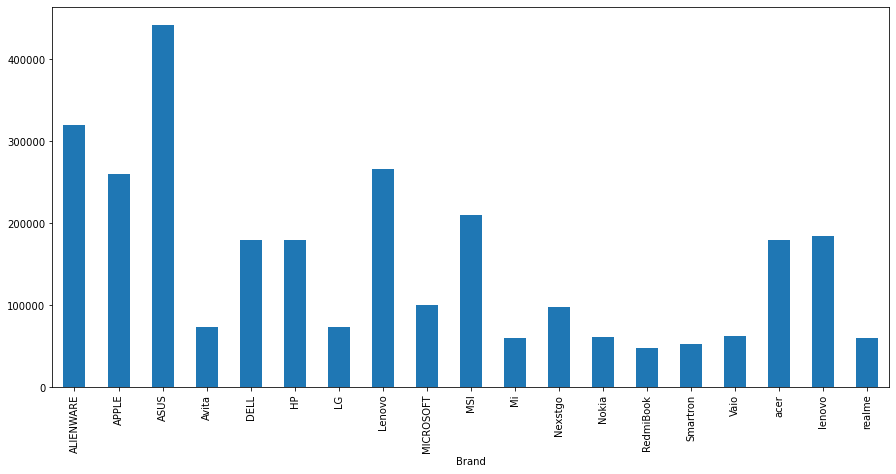

In [47]:
plt.figure(figsize=(15, 7))df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar')


<AxesSubplot:xlabel='Brand'>

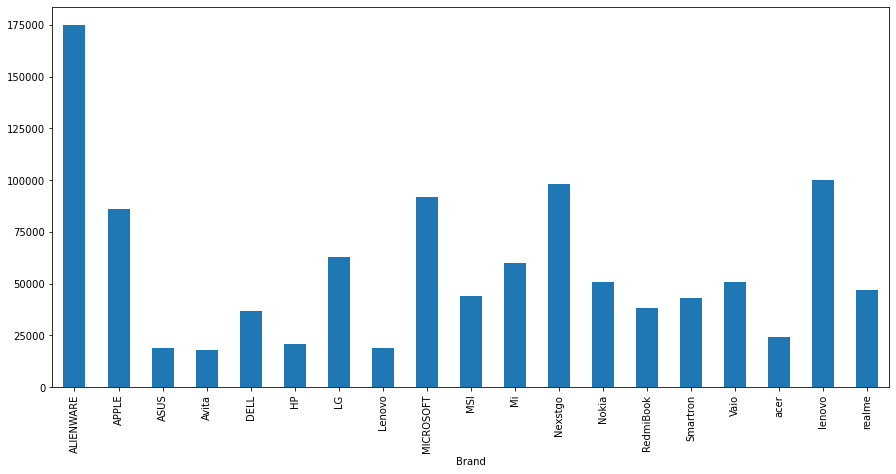

In [48]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')

<AxesSubplot:xlabel='Brand'>

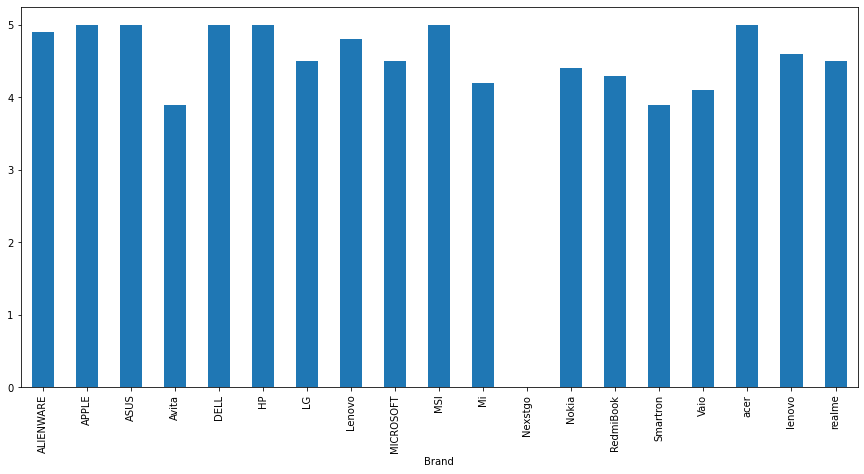

In [49]:
plt.figure(figsize=(15, 7))
df.groupby(['Brand'])['Rating'].max().plot(kind = 'bar')

<AxesSubplot:xlabel='MRP', ylabel='count'>

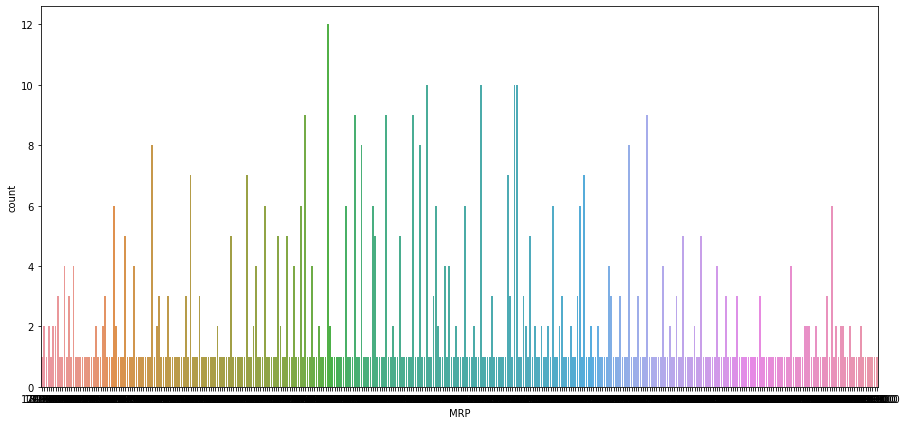

In [53]:
plt.figure(figsize=(15, 7))
sns.countplot(x=df.MRP)

# DONE BY - PIYUSH SAINI